# This script processes the tfm results of the minRadius study

1. Compile parallelcpp with:
```
make bin/parallelcpp
```
2. Run the benchmarking script
```
cd scripts
python3 run_par_minradius
```
3. The output that we will process is parallelcpp_minrad_coffee.txt (renamed from parallelcpp.out)

Here we compare the parallellcpp code using stage1tbb (without memoization) and using stage1tbbrem (with memoization) to assess the impact of the first memoization technique (based on the overlap)



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import sys
from statistics import mean

def tokenize(filename):
    experiment ={}

    with open(filename) as f:
        for line in f:
            tokens = line.split()
            if "Running:" in tokens:
                name=tokens[2].split("/")[3]
                nth=int(tokens[6])
                minRad = float(tokens[8])
                if name not in experiment:
                    experiment[name]={}
                if minRad not in experiment[name]:
                    experiment[name][minRad]={}
            if 'Quadtree' in tokens:
                experiment[name][minRad][nth]=[float(tokens[5])]
            if "STAGE" in tokens:
                experiment[name][minRad][nth].append(float(tokens[5]))
            if 'Average:' in tokens:
                experiment[name][minRad][nth].append(float(tokens[1]))

    #print(experiment)

    results = {}

    for i in experiment:
        results[i]={} #LiDAR cloud name
        for j in experiment[i]:
            results[i][j]={} #minRad
            for k in experiment[i][j]:
                results[i][j][k]={} #nth
                results[i][j][k]['qtree']=experiment[i][j][k][0]
                results[i][j][k]['stage1']=mean(experiment[i][j][k][1:16:3])
                results[i][j][k]['stage2']=mean(experiment[i][j][k][2:16:3])
                results[i][j][k]['stage3']=mean(experiment[i][j][k][3:16:3])
                results[i][j][k]['owm']=experiment[i][j][k][16]
    return results

resNOmemo=tokenize("parallel_minrad_norem_coffee.txt")
resmemo=tokenize("parallelcpp_minrad_coffee.txt")

#print(results)



In [7]:
for i,k in zip(resNOmemo,resmemo):
    timesNO=[resNOmemo[i][j][1]['owm'] for j in resNOmemo[i]]
    mintimeNO=min(timesNO)
    minRadNO=np.argmin(timesNO)
    print("Cloud {} with minRadius {:.1f} has sequential OWM best time = {:.2f}".format(i,list(resNOmemo[i].keys())[minRadNO],mintimeNO ))
    times=[resmemo[k][j][1]['owm'] for j in resmemo[k]]
    mintime=min(times)
    minRad=np.argmin(times)
    print("Cloud {} with memoization and minRadius {:.1f} has sequential OWM best time (speedup) = {:.2f} ({:.2f}x)".format(k,list(resmemo[k].keys())[minRad],mintime,mintimeNO/mintime) )


Cloud AlcoyH with minRadius 0.8 has sequential OWM best time = 1.63
Cloud Alcoy with memoization and minRadius 0.9 has sequential OWM best time (speedup) = 1.29 (1.27x)
Cloud ArzuaH with minRadius 0.3 has sequential OWM best time = 2.14
Cloud Arzua with memoization and minRadius 0.3 has sequential OWM best time (speedup) = 1.49 (1.44x)
Cloud BrionFH with minRadius 0.2 has sequential OWM best time = 3.77
Cloud BrionF with memoization and minRadius 0.3 has sequential OWM best time (speedup) = 1.88 (2.01x)
Cloud BrionUH with minRadius 0.2 has sequential OWM best time = 4.48
Cloud BrionU with memoization and minRadius 0.3 has sequential OWM best time (speedup) = 2.18 (2.06x)


In [8]:
for i,k in zip(resNOmemo,resmemo):
    timesNO=[resNOmemo[i][j][8]['owm'] for j in resNOmemo[i]]
    mintimeNO=min(timesNO)
    minRadNO=np.argmin(timesNO)
    print("Cloud {} with minRadius {:.1f} has 8-core OWM best time = {:.2f}".format(i,list(resNOmemo[i].keys())[minRadNO],mintimeNO ))
    times=[resmemo[k][j][8]['owm'] for j in resmemo[k]]
    mintime=min(times)
    minRad=np.argmin(times)
    print("Cloud {} with memoization and minRadius {:.1f} has 8-core OWM best time (speedup) = {:.2f} ({:.2f}x)".format(k,list(resmemo[k].keys())[minRad],mintime,mintimeNO/mintime) )



Cloud AlcoyH with minRadius 0.7 has 8-core OWM best time = 0.32
Cloud Alcoy with memoization and minRadius 0.9 has 8-core OWM best time (speedup) = 0.26 (1.23x)
Cloud ArzuaH with minRadius 0.4 has 8-core OWM best time = 0.42
Cloud Arzua with memoization and minRadius 0.3 has 8-core OWM best time (speedup) = 0.30 (1.38x)
Cloud BrionFH with minRadius 0.2 has 8-core OWM best time = 2.51
Cloud BrionF with memoization and minRadius 0.2 has 8-core OWM best time (speedup) = 1.34 (1.87x)
Cloud BrionUH with minRadius 0.1 has 8-core OWM best time = 2.92
Cloud BrionU with memoization and minRadius 0.1 has 8-core OWM best time (speedup) = 1.55 (1.88x)


In [10]:
for i in resNOmemo:
    times=[resNOmemo[i][j][1]['qtree'] for j in resNOmemo[i]]
    mintime=min(times)
    minRad=np.argmin(times)
    print("Cloud {} with minRadius {:.1f} has qtree creation best time = {:.2f}".format(i,list(resNOmemo[i].keys())[minRad],mintime ))
for i in resmemo:
    times=[resmemo[i][j][1]['qtree'] for j in resmemo[i]]
    mintime=min(times)
    minRad=np.argmin(times)
    print("Cloud {} with memoization and minRadius {:.1f} has qtree creation best time = {:.2f}".format(i,list(resmemo[i].keys())[minRad],mintime ))


Cloud AlcoyH with minRadius 1.9 has qtree creation best time = 0.71
Cloud ArzuaH with minRadius 1.2 has qtree creation best time = 1.37
Cloud BrionFH with minRadius 1.9 has qtree creation best time = 1.27
Cloud BrionUH with minRadius 1.6 has qtree creation best time = 1.45
Cloud Alcoy with memoization and minRadius 1.9 has qtree creation best time = 0.70
Cloud Arzua with memoization and minRadius 1.5 has qtree creation best time = 1.37
Cloud BrionF with memoization and minRadius 1.5 has qtree creation best time = 1.28
Cloud BrionU with memoization and minRadius 1.9 has qtree creation best time = 1.45


In [11]:
for i in resNOmemo:
    times=[resNOmemo[i][j][1]['qtree']+resNOmemo[i][j][8]['owm'] for j in resNOmemo[i]] #8-core OWM + qtree times
    mintime=min(times)
    minRad=np.argmin(times)
    print("Cloud {} with minRadius {:.1f} has total (8-core owm + qtree creation) best time = {:.2f}".format(i,list(resNOmemo[i].keys())[minRad],mintime ))
for i in resmemo:
    times=[resmemo[i][j][1]['qtree']+resmemo[i][j][8]['owm'] for j in resmemo[i]] #8-core OWM + qtree times
    mintime=min(times)
    minRad=np.argmin(times)
    print("Cloud {} with memoization and minRadius {:.1f} has total (8-core owm + qtree creation) best time = {:.2f}".format(i,list(resmemo[i].keys())[minRad],mintime ))


Cloud AlcoyH wint minRadius 1.1 has total (8-core owm + qtree creation) best time = 1.18
Cloud ArzuaH wint minRadius 1.0 has total (8-core owm + qtree creation) best time = 1.93
Cloud BrionFH wint minRadius 0.2 has total (8-core owm + qtree creation) best time = 5.38
Cloud BrionUH wint minRadius 0.3 has total (8-core owm + qtree creation) best time = 6.24
Cloud Alcoy wint minRadius 1.9 has total (8-core owm + qtree creation) best time = 1.10
Cloud Arzua wint minRadius 1.5 has total (8-core owm + qtree creation) best time = 1.78
Cloud BrionF wint minRadius 0.4 has total (8-core owm + qtree creation) best time = 3.89
Cloud BrionU wint minRadius 0.4 has total (8-core owm + qtree creation) best time = 4.50


# Execution time for each cloud with tfm/parallelcpp version depending on minRadius

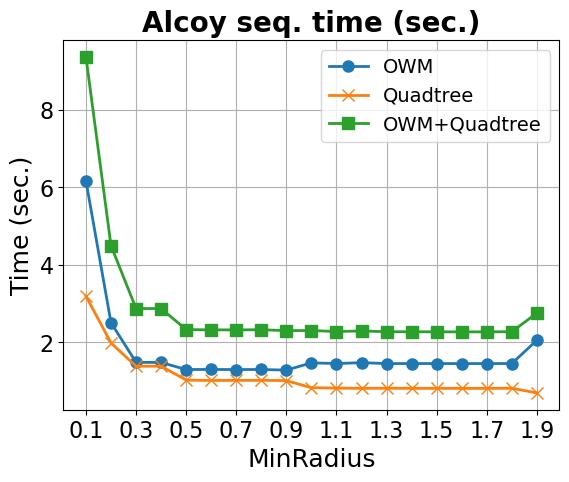

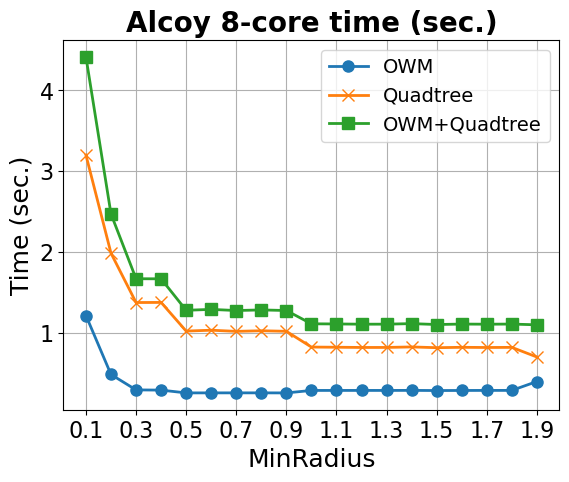

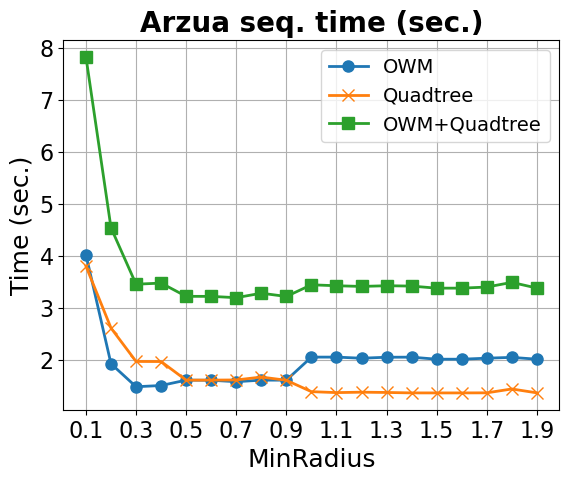

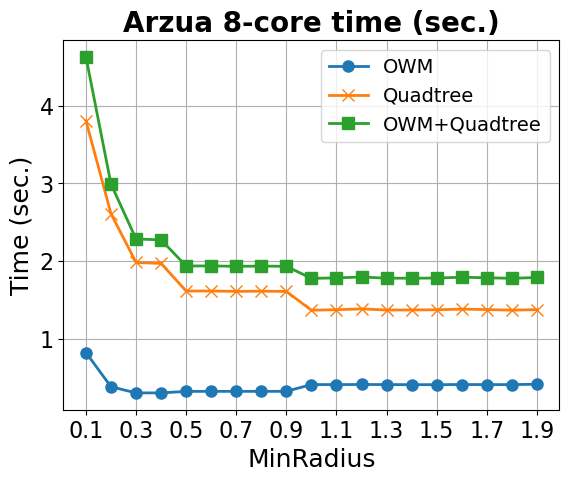

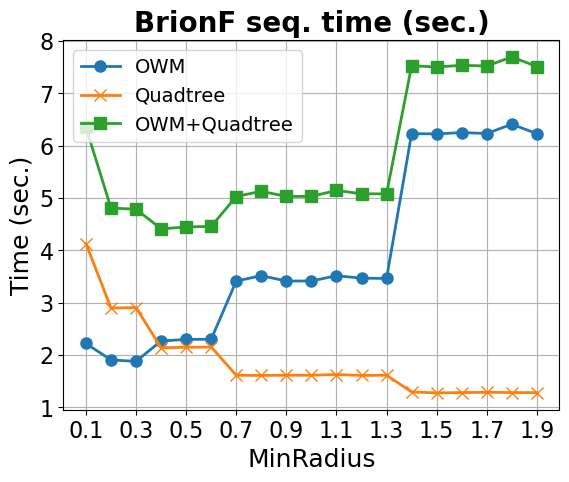

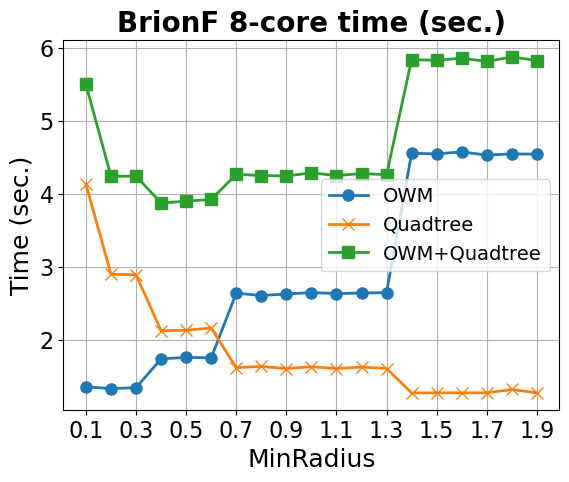

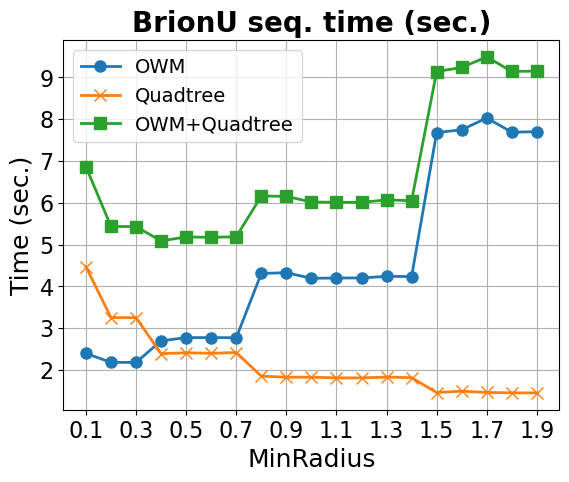

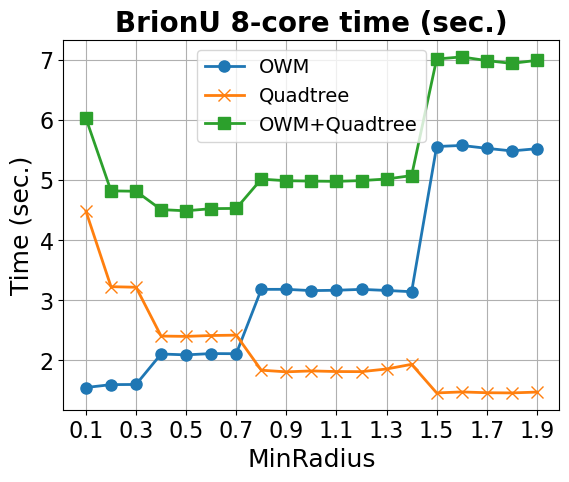

In [12]:
import matplotlib.pyplot as plt
def plot_cloudtime(cloudname,nth,results):
    #Configuration variables
    titlefs = 20
    ylabelfs = 18
    xlabelfs = 18
    xticksfs = 16
    yticksfs = 16
    legendfs = 14
    linew = 2
    markers = 8
    marks=['o-','x-','s-','v-','+-']

    x=list(results[cloudname].keys())
    fig = plt.figure()
    plt.plot(np.array(x), np.array([results[cloudname][i][nth]['owm'] for i in x]), marks[0], linewidth=linew, markersize=markers)
    plt.plot(np.array(x), np.array([results[cloudname][i][nth]['qtree'] for i in x]), marks[1], linewidth=linew, markersize=markers)
    plt.plot(np.array(x), np.array([results[cloudname][i][nth]['qtree']+results[cloudname][i][nth]['owm'] for i in x]), marks[2], linewidth=linew, markersize=markers)

    labels=['OWM','Quadtree','OWM+Quadtree']
    if nth==1:
        plt.title(cloudname+' seq. time (sec.)',  fontweight='bold', fontsize=titlefs)
    else:
        plt.title(cloudname+' 8-core time (sec.)',  fontweight='bold', fontsize=titlefs)
    plt.legend(labels,loc='best', fontsize= legendfs)
    plt.ylabel('Time (sec.)', fontsize=ylabelfs)
    plt.xlabel('MinRadius', fontsize=xlabelfs)
    plt.xticks(x[::2],fontsize=xticksfs)
    plt.yticks(fontsize=yticksfs)
    plt.grid()

    plt.show()

plot_cloudtime('Alcoy',1,resmemo)
plot_cloudtime('Alcoy',8,resmemo)
plot_cloudtime('Arzua',1,resmemo)
plot_cloudtime('Arzua',8,resmemo)
plot_cloudtime('BrionF',1,resmemo)
plot_cloudtime('BrionF',8,resmemo)
plot_cloudtime('BrionU',1,resmemo)
plot_cloudtime('BrionU',8,resmemo)

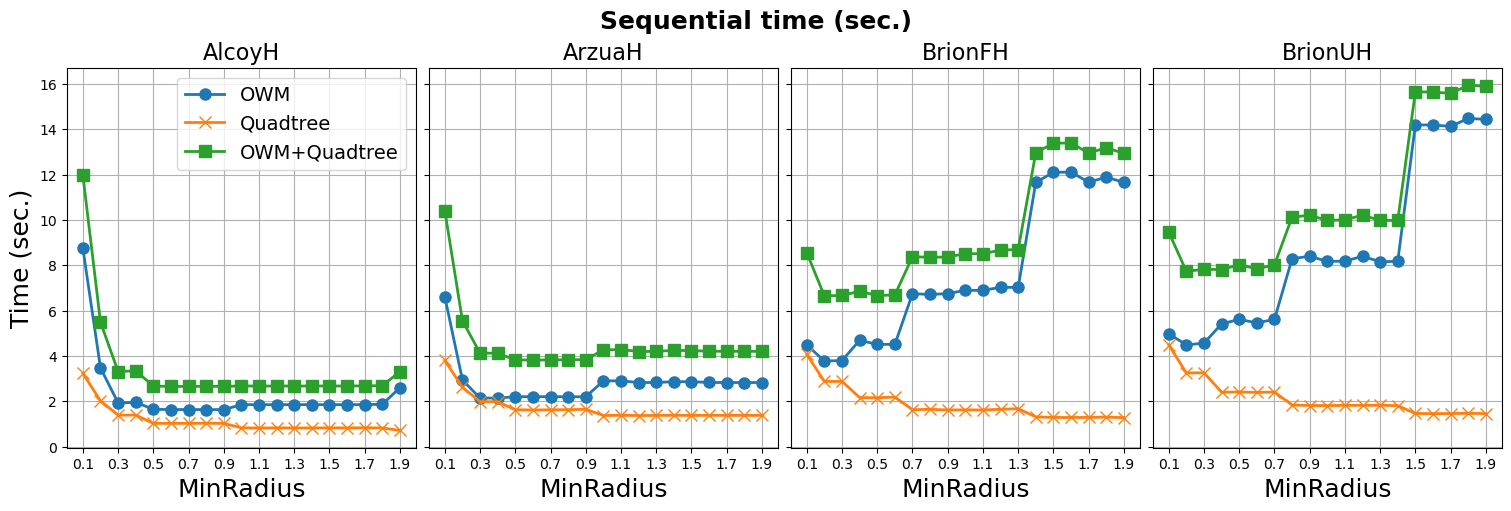

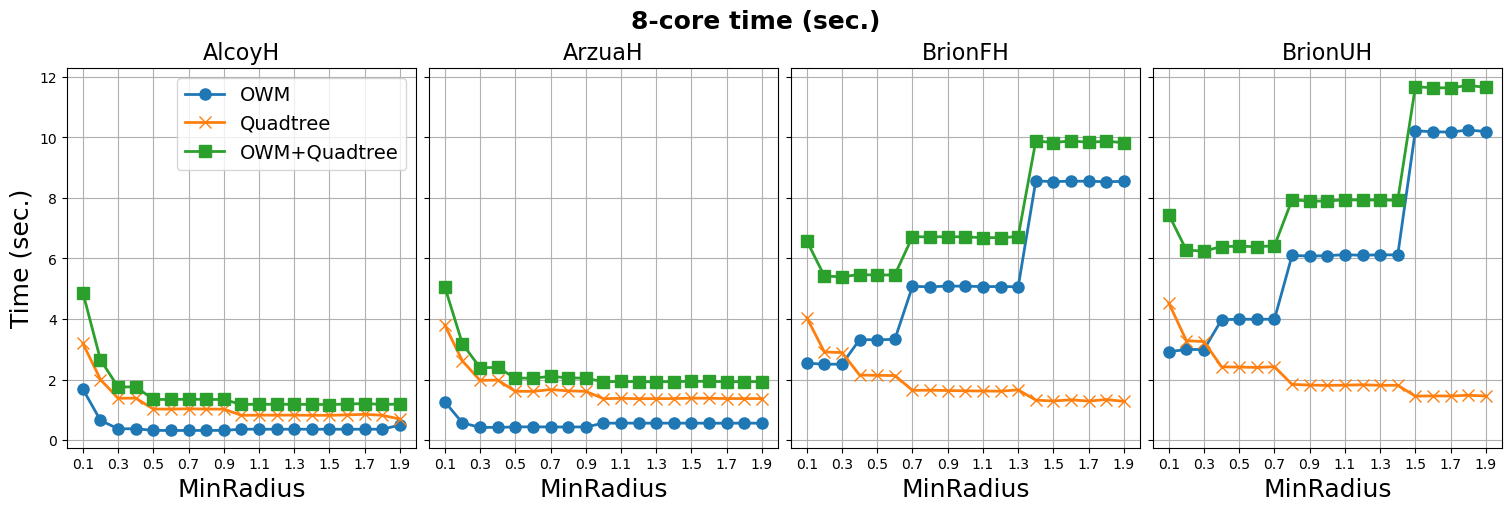

In [14]:
def plot_alltimes(nth,results):
    #Configuration variables
    titlefs = 20
    ylabelfs = 18
    xlabelfs = 18
    xticksfs = 16
    yticksfs = 16
    legendfs = 14
    linew = 2
    markers = 8
    marks=['o-','x-','s-','v-','+-']

    #fig = plt.figure()
    labels=['OWM','Quadtree','OWM+Quadtree']
    #define grid of plots
    fig, axs = plt.subplots(nrows=1, ncols=4,figsize=(15, 5), constrained_layout=True, sharey=True)
    for i,name in zip(range(4),['AlcoyH','ArzuaH','BrionFH','BrionUH']):
        x=list(results[name].keys())
        axs[i].plot(np.array(x), np.array([results[name][i][nth]['owm'] for i in x]), marks[0], linewidth=linew, markersize=markers)
        axs[i].plot(np.array(x), np.array([results[name][i][nth]['qtree'] for i in x]), marks[1], linewidth=linew, markersize=markers)
        axs[i].plot(np.array(x), np.array([results[name][i][nth]['qtree']+results[name][i][nth]['owm'] for i in x]), marks[2], linewidth=linew, markersize=markers)

        axs[i].set_title(name,fontsize=16)
        axs[i].set_xlabel('MinRadius', fontsize=xlabelfs)
        axs[i].set_xticks(x[::2],fontsize=xticksfs)
        # axs[i].yticks(fontsize=yticksfs)
        axs[i].grid()

    if nth==1:
        fig.suptitle('Sequential time (sec.)',  fontweight='bold', fontsize=18)
    else:
        fig.suptitle('8-core time (sec.)',  fontweight='bold', fontsize=18)
    axs[0].set_ylabel('Time (sec.)', fontsize=ylabelfs)
    axs[0].legend(labels,loc='best', fontsize= 14)
    #axs[i].show()

plot_alltimes(1,resNOmemo)
plot_alltimes(8,resNOmemo)


In [49]:

pp = PdfPages("Speedup-qmin.pdf")
pp.savefig(fig)
pp.close()